<a href="https://colab.research.google.com/github/MaheshReddy0806/AIML/blob/main/Lab%20Exam(SET%20A)14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
# Step 1: Load the dataset
# For this example, we'll create a mock dataset. Replace it with your actual data file.
# df = pd.read_csv('car_evaluation.csv')  # Uncomment and use your actual dataset

data = {
    'buying': np.random.choice(['low', 'med', 'high', 'vhigh'], 100),
    'maint': np.random.choice(['low', 'med', 'high'], 100),
    'doors': np.random.choice([2, 3, 4, 5], 100),
    'persons': np.random.choice([2, 4], 100),
    'lug_boot': np.random.choice(['small', 'med', 'big'], 100),
    'safety': np.random.choice(['low', 'med', 'high'], 100),
    'class': np.random.choice(['unacc', 'acc', 'good', 'vgood'], 100),
    'paint': np.random.choice(['red', 'blue', 'green', 'black'], 100)
}

df = pd.DataFrame(data)

In [24]:
# Step 2: Identify the top 5 reasons for buying a car based on correlation with 'class' (target variable)
# Encode categorical data
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Correlation matrix
correlation_matrix = df.corr()
top_5_reasons = correlation_matrix['class'].sort_values(ascending=False)[1:6]
print("Top 5 reasons for buying a car based on correlation with 'class':")
print(top_5_reasons)

Top 5 reasons for buying a car based on correlation with 'class':
persons     0.157078
maint       0.075686
safety     -0.011898
paint      -0.013028
lug_boot   -0.030771
Name: class, dtype: float64


In [25]:
# Step 3: Identify the class with most cars sold
class_counts = df['class'].value_counts()
print("\nClass with most cars sold:")
print(class_counts)


Class with most cars sold:
class
1    31
2    31
3    20
0    18
Name: count, dtype: int64


In [26]:
# Step 4: Find the max and min safety choice for car buying
max_safety = df['safety'].max()
min_safety = df['safety'].min()
print(f"\nMax safety choice: {max_safety}, Min safety choice: {min_safety}")


Max safety choice: 2, Min safety choice: 0


In [27]:
# Step 5: What is the role of paint, doors, lug_boot in car buying?
# We can look at the correlation of these attributes with the target 'class'
print("\nRole of Paint, Doors, and Lug Boot in car buying:")
paint_role = correlation_matrix['class']['paint']
doors_role = correlation_matrix['class']['doors']
lug_boot_role = correlation_matrix['class']['lug_boot']
print(f"Paint: {paint_role}, Doors: {doors_role}, Lug Boot: {lug_boot_role}")


Role of Paint, Doors, and Lug Boot in car buying:
Paint: -0.01302837194721963, Doors: -0.030867602000359005, Lug Boot: -0.030771483146337472


In [28]:
# Step 6: Identify the cars with most maintenance
most_maintenance = df[df['maint'] == df['maint'].max()]
print("\nCars with most maintenance:")
print(most_maintenance)


Cars with most maintenance:
    buying  maint  doors  persons  lug_boot  safety  class  paint
1        1      2      3        1         0       0      3      1
3        0      2      1        1         2       0      3      3
6        2      2      1        1         1       2      2      0
9        3      2      2        1         2       1      1      3
11       0      2      0        1         0       0      3      1
16       0      2      0        1         2       2      1      0
25       0      2      2        1         2       2      2      3
35       1      2      0        0         1       2      0      3
38       2      2      1        1         1       1      2      3
40       1      2      1        0         0       0      2      2
41       0      2      0        0         0       0      2      1
42       0      2      3        0         2       0      2      2
48       2      2      3        0         1       1      0      0
51       2      2      3        0         1    

In [29]:
# Step 7: Apply Classification Model (Random Forest Classifier)
# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

In [30]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Classification Model Evaluation:
Accuracy: 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.25      0.27         8
           2       0.43      0.43      0.43         7
           3       0.25      0.33      0.29         3

    accuracy                           0.30        20
   macro avg       0.24      0.25      0.25        20
weighted avg       0.30      0.30      0.30        20



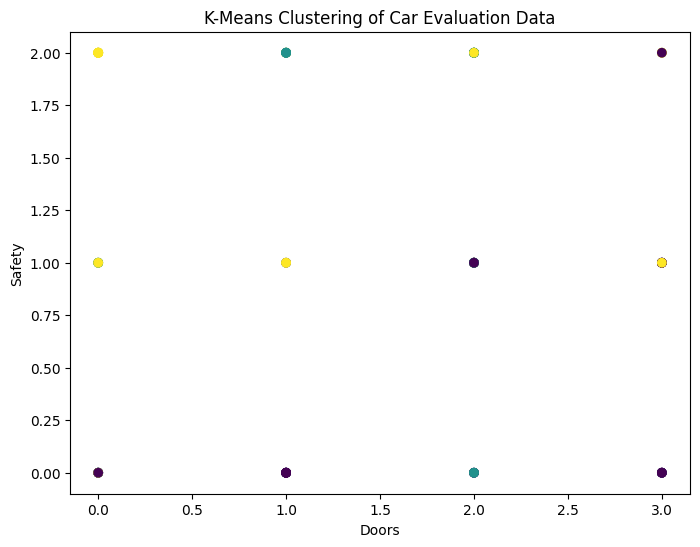

In [31]:
# Step 8: Apply Clustering Model (KMeans)
# Scale the features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering (n_clusters can be adjusted based on your needs)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using 'doors' and 'safety' for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(df['doors'], df['safety'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Car Evaluation Data')
plt.xlabel('Doors')
plt.ylabel('Safety')
plt.show()